## CMIP6 with Zarr
Exercise run the morning of Mar 28th, Thursday, of Arctic Data Center course

In [1]:
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import gcsfs # Google Cloud Storage (File System)?

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [3]:
df_ta = df.query("activity_id=='CMIP' & table_id == 'Oday' & variable_id == 'tos' & experiment_id == 'historical' & institution_id == 'NOAA-GFDL'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9445,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
9446,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
244828,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Oday,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726
244829,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Oday,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [5]:
type(df_ta)

pandas.core.frame.DataFrame

In [4]:
gcs = gcsfs.GCSFileSystem(token = 'anon') # a way to get into the google cloud
    # Very cool- CMIP6 data allows anonymous data access.

In [6]:
zstore = df_ta.zstore.values[-1] # The url/path to the data on google cloud
mapper = gcs.get_mapper(zstore)

In [7]:
ds = xr.open_zarr(mapper)
ds
# Apparently this is about 30 GB.  But can't be read easily by the xarray.  
    # Estimated as 8 bytes by the number of records.

<xarray.Dataset> Size: 16GB
Dimensions:    (lat: 180, bnds: 2, lon: 360, time: 60225)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object 964kB dask.array<chunksize=(30113, 1), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tos        (time, lat, lon) float32 16GB dask.array<chunksize=(374, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/a5569126-1a36-4212-947e-ae7c9cc237e5
    variable_id:            tos
    variant_info:           N/A
    variant_label:          r1i1p1f1
    version_id:             v20190726

In [9]:
# This xarray dataset only has one variable, tos.
otemp_99 = ds.tos.sel(time = '1999-01-01').squeeze()
otemp_99

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    time     object 8B 1999-01-01 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Temperature
    original_name:  tos
    standard_name:  sea_surface_temperature
    units:          degC

In [ ]:
otemp_99.load()

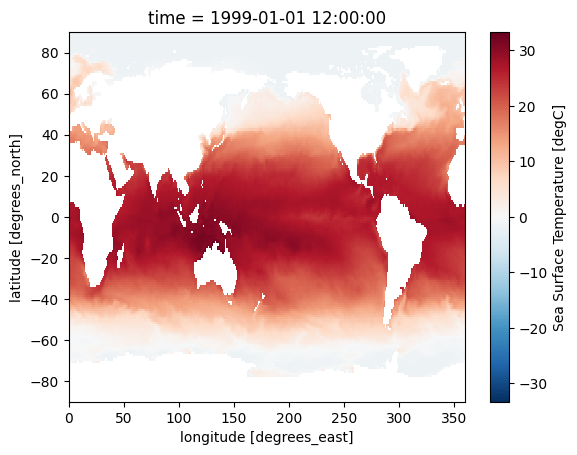

In [10]:
otemp_99.plot()

In [29]:
# extract a timeseries at lat = 0, lon = 272
ts_at_loc = ds.tos.sel(lat = 0, lon=272, method='nearest')
ts_at_loc

<xarray.DataArray 'tos' (time: 60225)> Size: 241kB
dask.array<getitem, shape=(60225,), dtype=float32, chunksize=(374,), chunktype=numpy.ndarray>
Coordinates:
    lat      float64 8B 0.5
    lon      float64 8B 272.5
  * time     (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Temperature
    original_name:  tos
    standard_name:  sea_surface_temperature
    units:          degC

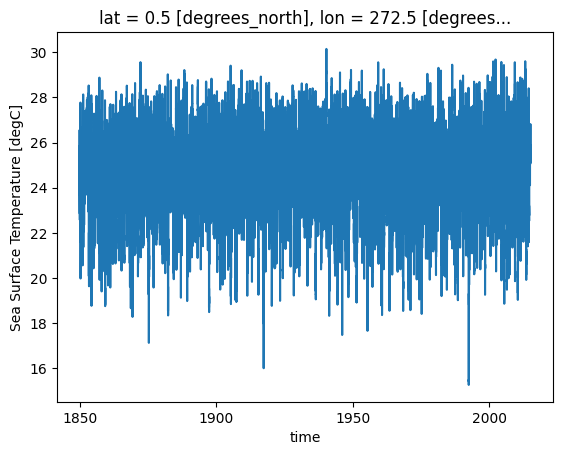

In [30]:
ts_at_loc.load() # Load not really necessary
ts_at_loc.plot()

In [27]:
ts_ann = ts_at_loc.rolling(time = 365).mean()


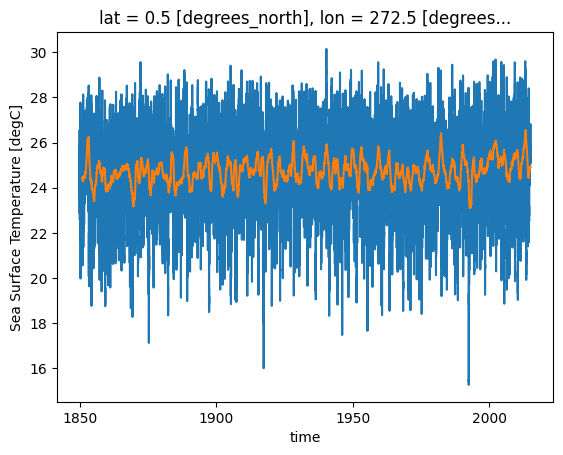

In [31]:
ts_at_loc.plot()
ts_ann.plot()

Bring in nitrate level- 4D

In [32]:
no3 = df.query("activity_id=='CMIP' & table_id == 'Omon' & experiment_id == 'historical' & institution_id == 'NOAA-GFDL' & variable_id == 'no3'")
ds_no3 = xr.open_zarr(gcs.get_mapper(no3.zstore.values[-1]), consolidated=True)

In [33]:
ds_no3

<xarray.Dataset> Size: 18GB
Dimensions:    (lat: 180, bnds: 2, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 280B 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 560B dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    no3        (time, lev, lat, lon) float32 18GB dask.array<chunksize=(13, 35, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/d9cb7088-95d0-4188-84bb-e51e85b22146...
    variable_id:            no3
    variant_info:           N/A
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/d9cb7088-95d0-4188-84bb-e51e85b22146...
    version_id:             v20190726